## Key using RGB
con - tendency to leak into other colors

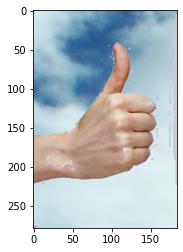

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open('./img/Thumb_Up.bmp')
im2 = Image.new('RGBA',im.size)

var = 25
key = (186,188,189)
newimage = []
for i in im.getdata():
    if key[0]-var <= i[0] <= key[0]+var and key[1]-var <= i[1] <= key[1]+var and key[2]-var <= i[2] <= key[2]+var :
        newimage.append((i[0],i[1],i[2],0))
    else :
        newimage.append((i[0],i[1],i[2],255))
im2.putdata(newimage)

sky = Image.open('./img/sky.jpg').convert('RGBA')
im_new = Image.new('RGBA',im.size)
im_new.paste(sky)
im_new.paste(im2,(0,0), im2) # image, location, mask
plt.imshow(im_new)
plt.show()

## multipoint RGB

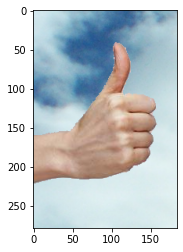

In [2]:
from PIL import Image

im = Image.open('./img/Thumb_Up.bmp')
im2 = Image.new('RGBA',im.size)

var = 21
keys = [(180,183,195),(194,198,210),(165,169,184),(193,185,206)]
newimage = []

for i in im.getdata():
    remove = False
    for key in keys:
        if key[0]-var <= i[0] <= key[0]+var and key[1]-var <= i[1] <= key[1]+var and key[2]-var <= i[2] <= key[2]+var :
            remove = True
            break
    if remove :
        newimage.append((i[0],i[1],i[2],0))
    else :
        newimage.append((i[0],i[1],i[2],255))
im2.putdata(newimage)

im_new = Image.new('RGBA',im.size)
im_new.paste(sky)
im_new.paste(im2,(0,0), im2) # image, location, mask
plt.imshow(im_new)
plt.show()

## Key using HSV
pro - better at removing same color that has different shades.  
con - a little slower

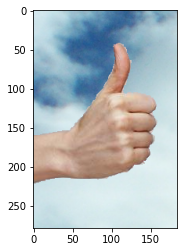

In [78]:
from PIL import Image
import numpy as np

im = Image.open('./img/Thumb_Up.bmp')
imHSL = im.convert('HSV')
im2 = Image.new('RGBA',im.size)
imRBGd = im.getdata()
imHSLd = imHSL.getdata()

Hvar = 80
Svar = 255
Vvar = 255
key = (200, 31, 186)
newimage = []
for i in range(np.array(imHSLd).shape[0]):
    if key[0]-Hvar <= imHSLd[i][0] <= key[0]+Hvar and key[1]-Svar <= imHSLd[i][1] <= key[1]+Svar and key[2]-Vvar <= imHSLd[i][2] <= key[2]+Vvar :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],0))
    else :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],255))
im2.putdata(newimage)
im_new = Image.new('RGBA',im.size)
im_new.paste(sky)
im_new.paste(im2,(0,0), im2) # image, location, mask
plt.imshow(im_new)
plt.show()

## target HSV = fix H,remove all SV ; fix SV, remove all H

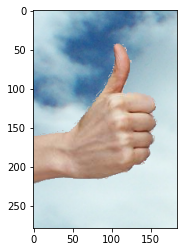

In [93]:
from PIL import Image

im = Image.open('./img/Thumb_Up.bmp')
imHSLd = im.convert('HSV')
im2 = Image.new('RGBA',im.size)
imRBGd = im.getdata()
imHSLd = imHSL.getdata()


key = (200, 31, 186)

Hkeyvar = 80 # small
SVvar = 200 # large

SVkeyvar = 15 # small
Hvar = 200 # large

newimage = []


for i in range(np.array(imHSLd).shape[0]):
    # removal using Hkey
    if key[0]-Hkeyvar <= imHSLd[i][0] <= key[0]+Hkeyvar and key[1]-SVvar <= imHSLd[i][1] <= key[1]+SVvar and key[2]-SVvar <= imHSLd[i][2] <= key[2]+SVvar :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],0))
    # removal using SVkey
    elif key[0]-Hvar <= imHSLd[i][0] <= key[0]+Hvar and key[1]-SVkeyvar <= imHSLd[i][1] <= key[1]+SVkeyvar and key[2]-SVkeyvar <= imHSLd[i][2] <= key[2]+SVkeyvar:
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],0))
    else :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],255))
im2.putdata(newimage)
im_new = Image.new('RGBA',im.size)
im_new.paste(sky)
im_new.paste(im2,(0,0), im2) # image, location, mask
plt.imshow(im_new)
plt.show()

## multipoint HSV key

[[166  31 186]
 [166  31 185]
 [166  31 185]
 ...
 [155  21 213]
 [155  21 214]
 [155  21 214]]


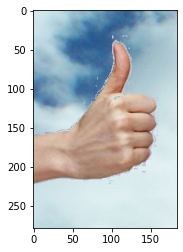

In [95]:
from PIL import Image

im = Image.open('./img/Thumb_Up.bmp')
imHSLd = im.convert('HSV')
im2 = Image.new('RGBA',im.size)
imRBGd = im.getdata()
imHSLd = imHSL.getdata()
print(np.array(imHSLd))
Hvar = 20
Svar = 18
Vvar = 30
keys = [(166, 31, 186),(21, 10, 202),(179,20,198)]

newimage = []

for i in range(np.array(imHSLd).shape[0]):
    remove = False
    for key in keys:
        if key[0]-Hvar <= imHSLd[i][0] <= key[0]+Hvar and key[1]-Svar <= imHSLd[i][1] <= key[1]+Svar and key[2]-Vvar <= imHSLd[i][2] <= key[2]+Vvar :
            remove = True
            break
    if remove :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],0))
    else :
        newimage.append((imRBGd[i][0],imRBGd[i][1],imRBGd[i][2],255))
im2.putdata(newimage)
im_new = Image.new('RGBA',im.size)
im_new.paste(sky)
im_new.paste(im2,(0,0), im2) # image, location, mask
plt.imshow(im_new)
plt.show()